In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv('googleplaystore.csv')

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [5]:
df.shape

(10841, 13)

In [6]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [7]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
# Data Cleaning
# Convert 'Reviews' column to numeric, invalid parsing will be set as NaN
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Ensure 'Installs' column is treated as string before cleaning
df['Installs'] = df['Installs'].astype(str)
# Remove commas and plus signs, then convert to numeric
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '')
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Ensure 'Price' column is treated as string before cleaning
df['Price'] = df['Price'].astype(str)
# Remove dollar signs and then convert to numeric
df['Price'] = df['Price'].str.replace('$', '')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Fill missing 'Rating' values with the mean rating
df['Rating'].fillna(df['Rating'].mean(), inplace=True)

# Drop rows with missing critical values
df.dropna(subset=['Type', 'Content Rating', 'Current Ver', 'Android Ver'], inplace=True)


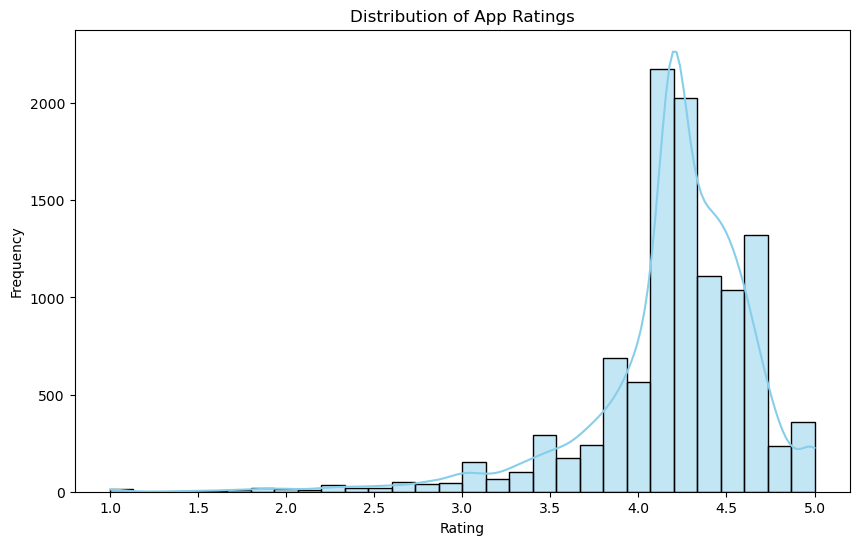

In [9]:
# 1. Distribution of App Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

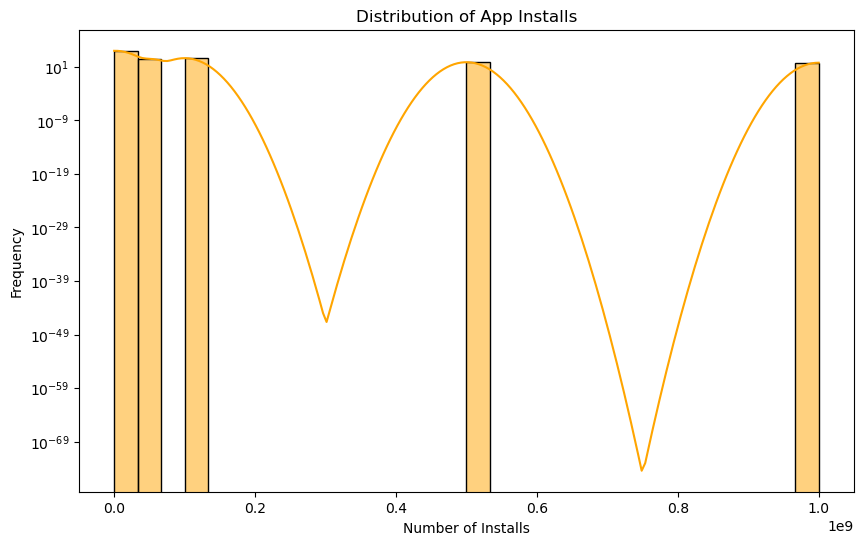

In [10]:
# 2. Distribution of App Installs
plt.figure(figsize=(10, 6))
sns.histplot(df['Installs'], bins=30, kde=True, color='orange')
plt.title('Distribution of App Installs')
plt.xlabel('Number of Installs')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()


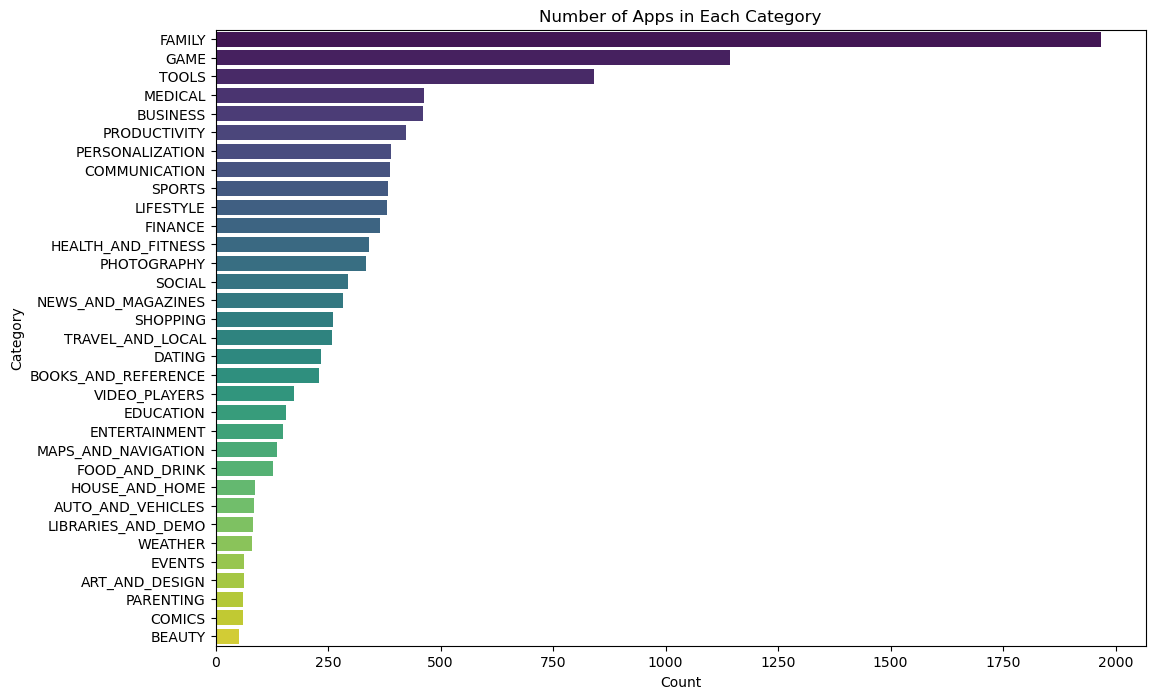

In [11]:
# 3. Category-wise Success: Number of Apps and Avg Rating by Category
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='Category', order=df['Category'].value_counts().index, palette='viridis')
plt.title('Number of Apps in Each Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()


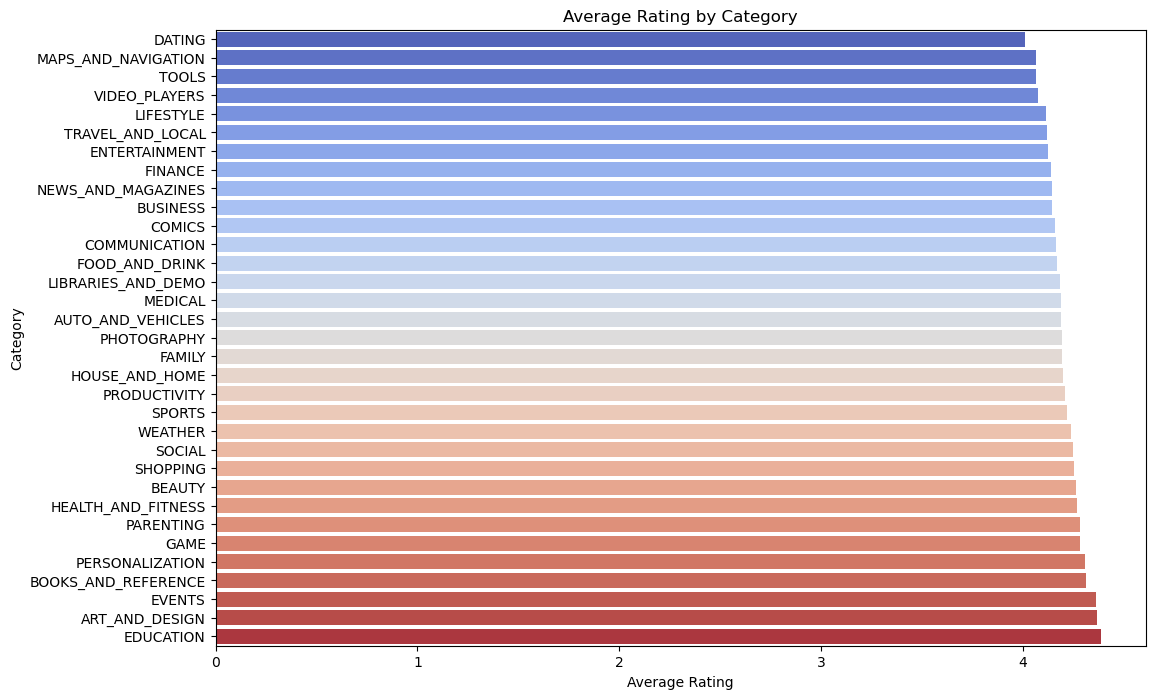

In [12]:
# Category-wise average rating
plt.figure(figsize=(12, 8))
category_rating = df.groupby('Category')['Rating'].mean().sort_values()
sns.barplot(x=category_rating, y=category_rating.index, palette='coolwarm')
plt.title('Average Rating by Category')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.show()

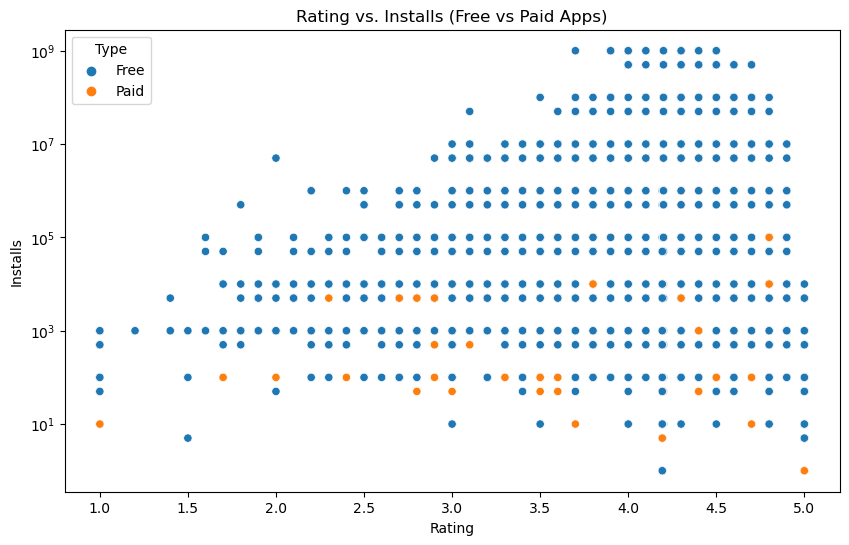

In [13]:
# 4. Relationship between Installs and Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='Installs', data=df, hue='Type')
plt.title('Rating vs. Installs (Free vs Paid Apps)')
plt.xlabel('Rating')
plt.ylabel('Installs')
plt.yscale('log')
plt.show()

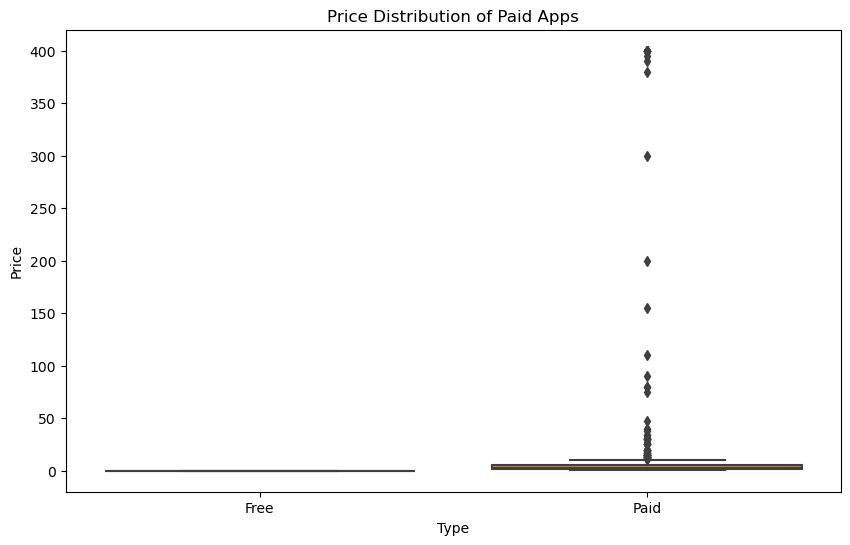

In [14]:
# 5. Monetization Strategy: Free vs Paid Apps and Price Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Price', data=df)
plt.title('Price Distribution of Paid Apps')
plt.xlabel('Type')
plt.ylabel('Price')
plt.show()


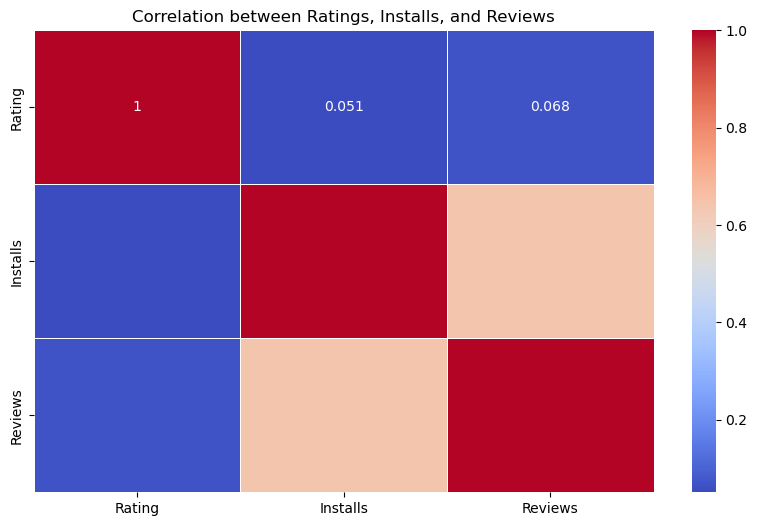

In [15]:
# 6. Correlation between Ratings, Installs, and Reviews
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Rating', 'Installs', 'Reviews']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation between Ratings, Installs, and Reviews')
plt.show()

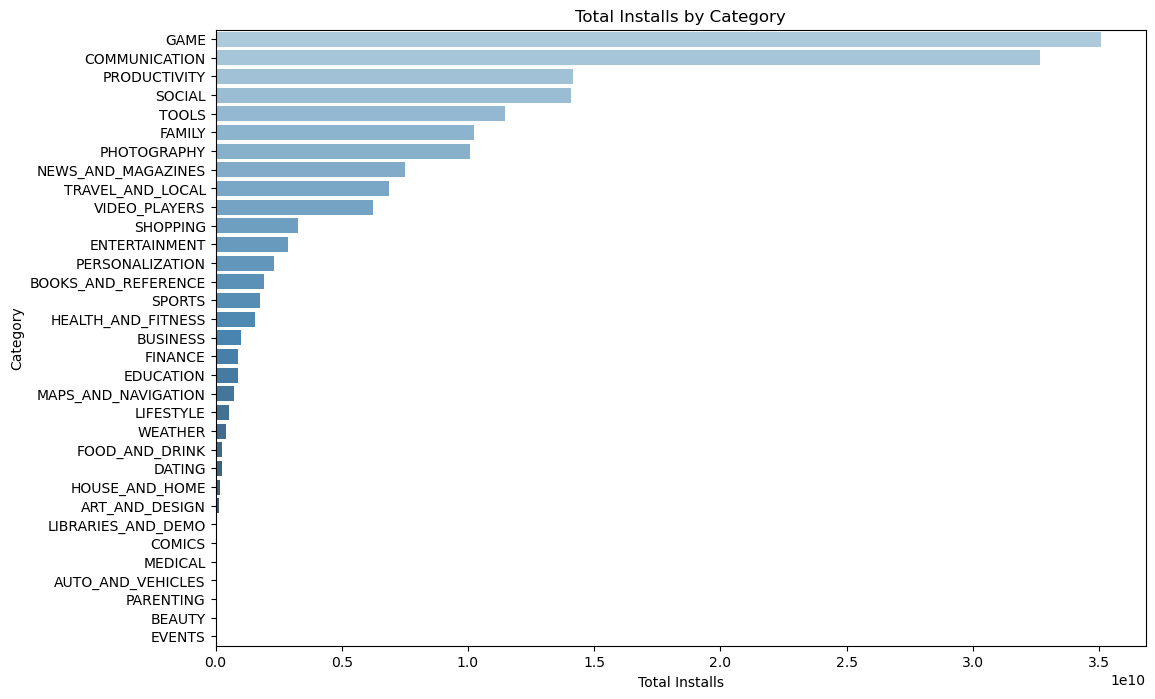

In [16]:
# 7. Category-wise Total Installs (Popularity by Category)
category_installs = df.groupby('Category')['Installs'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=category_installs, y=category_installs.index, palette='Blues_d')
plt.title('Total Installs by Category')
plt.xlabel('Total Installs')
plt.ylabel('Category')
plt.show()


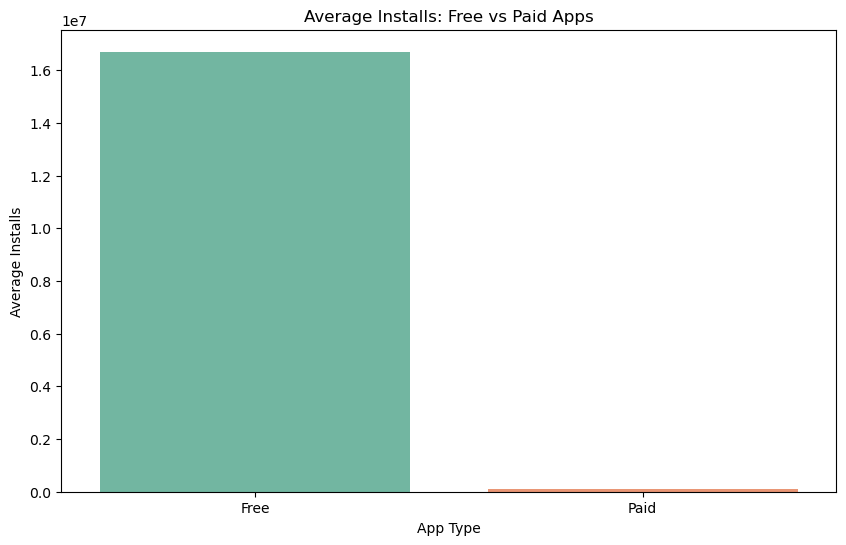

In [17]:
# 8. Free vs Paid Apps: Average Installs
plt.figure(figsize=(10, 6))
free_vs_paid = df.groupby('Type')['Installs'].mean()
sns.barplot(x=free_vs_paid.index, y=free_vs_paid.values, palette='Set2')
plt.title('Average Installs: Free vs Paid Apps')
plt.xlabel('App Type')
plt.ylabel('Average Installs')
plt.show()

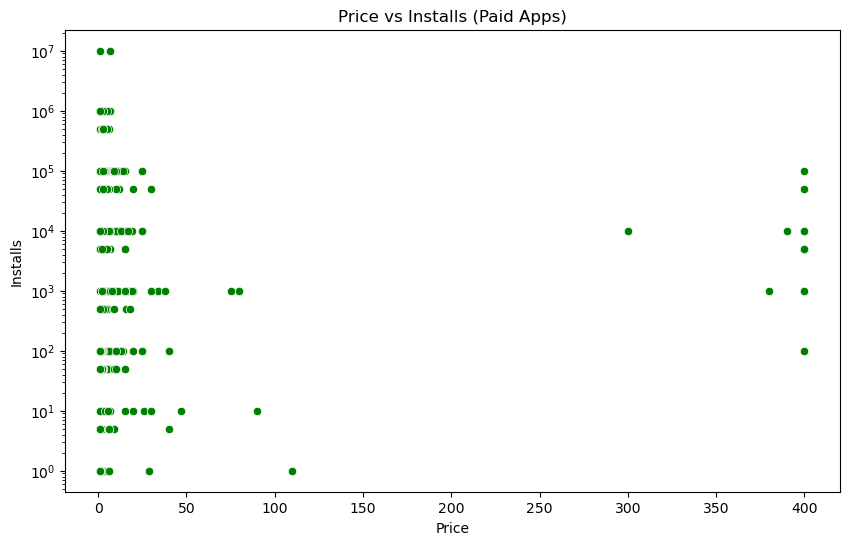

In [18]:
# 9. Price Impact on Installs (Paid Apps Only)
paid_apps = df[df['Type'] == 'Paid']
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Installs', data=paid_apps, color='green')
plt.title('Price vs Installs (Paid Apps)')
plt.xlabel('Price')
plt.ylabel('Installs')
plt.yscale('log')
plt.show()